# Final Notebook Analysis

## Opportunity Youth Status in South King County

Our project task was to determine the current status of Opportunity Youth in South King County by utilizing the 2013-2017 ACS 5-Year PUMS data.

## Plan for Analysis
- Import dataset
- Do analysis
- Find estimated numbers of Opportunity Youth
- Visualize Findings

The following cell allows us to import functions written in a separate file.

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

## Import Dataset

To import the dataset, first we need to import our prewritten functions from our .py files.

In [20]:
import src.mc_functions as mcf

Now that we have access to our functions, we can begin importing the data. To start we will import the following columns from the ACS database and store it in the wa_df variable (Washington DataFrame)
- serialno: Serial Number
- puma: Public Use Microdata Area code
- pwgtp: Weight of given observation
- agep: Age of individual
- sch: School status of individual
- esr: Work status of individual

Since we defined Opportunity Youth as any indiviudal between the ages of 16 and 24, we will filter the initial SQL query to only include that age range.

In [4]:
wa_df = mcf.data_import()

The data is now imported and stored in the wa_df variable. It's important to note at this point that the dataframe contains information on individuals between the ages of 16 and 24 in all of Washington, not just South King County. We will filter the data more further along in our analysis. For now, we can make sure our dataframe looks correct.

In [7]:
wa_df.head()

,serialno,puma,pwgtp,agep,sch,esr
0,2013001209267,11611,16.0,21.0,2,6
1,2013001209287,11611,23.0,20.0,1,1
2,2013001209437,11402,43.0,20.0,1,1
3,2013001209877,11613,78.0,24.0,1,6
4,2013001211681,11704,20.0,19.0,2,6


We have all the columns we wanted, now we can check for any missing data in our dataframe.

In [5]:
wa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38170 entries, 0 to 38169
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   serialno  38170 non-null  object 
 1   puma      38170 non-null  object 
 2   pwgtp     38170 non-null  float64
 3   agep      38170 non-null  float64
 4   sch       38170 non-null  object 
 5   esr       38170 non-null  object 
dtypes: float64(2), object(4)
memory usage: 1.7+ MB


No missing data. The next step is to create a new dataframe that contains only those considered Opportunity Youth. To reiterate our Opportunity Youth definition from earlier, it's any individual between the ages of 16 and 24 who is not in school and is unemployed or not in the labor force. Since we only selected those in the 16-24 age range, we now just need to focus on school status and work status. The 'sch' column contains information on schooling status. When 'sch' is equal to '1' it means the individual is not in school. The 'esr' column contains information on work status. When 'esr' is equal to '3' it means the indiviudal is unemployed, when it equals '6' it means the individual is not in the labor force. We have a predefined function that sifts through the data and selects only those who meet those conditions.

In [10]:
oy_df = mcf.oy_df(wa_df)

Okay now we have a dataframe that contains only those considered Opportunity Youth (again, in all of Washington). Let's make sure the dataframe is correct.

In [11]:
oy_df.head()

,serialno,puma,pwgtp,agep,sch,esr
3,2013001209877,11613,78.0,24.0,1,6
13,2013001213366,11101,22.0,22.0,1,3
15,2013001213904,11504,44.0,21.0,1,3
17,2013001214388,11505,6.0,24.0,1,6
18,2013001214388,11505,5.0,22.0,1,3


Once again all the columns look correct, now we can check for any missing data.

In [12]:
oy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4488 entries, 3 to 38166
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   serialno  4488 non-null   object 
 1   puma      4488 non-null   object 
 2   pwgtp     4488 non-null   float64
 3   agep      4488 non-null   float64
 4   sch       4488 non-null   object 
 5   esr       4488 non-null   object 
dtypes: float64(2), object(4)
memory usage: 245.4+ KB


No missing data so we can proceed to our data analysis.

## Data Analysis

To begin our analysis specifically for South King County, we first need to designate which PUMA codes are considered King County and South King County. We defined King County as having PUMA codes 11601-11616 and South King County as a subset of that, having PUMA codes 11610-11614.

In [13]:
# King County PUMA codes 11601-11610
kc_pumas = ['11601', '11602', '11603', '11604', '11605', '11606', '11607', 
'11608', '11609', '11610', '11611', '11612', '11613', '11614', '11615', '11616']
# South King County PUMA codes 11610-11614
skc_pumas = ['11610', '11611', '11612', '11613', '11614']

Now that we have defined the areas considered King County and South King County according to their PUMA codes, we can utilize a prewritten function that creates a dictionary from a given dataframe with the key as PUMA codes and the value as the number of people within each PUMA in that dataframe. 

In [14]:
# Number of Opportunity Youth in each King County PUMA code
kc_oy_per_puma = mcf.create_puma_dict(oy_df, kc_pumas)
# Number of Opportunity Youth in each South King County PUMA code
skc_oy_per_puma = mcf.create_puma_dict(oy_df, skc_pumas)

The dictionary 'skc_oy_per_puma' contains the number of Opportunity Youth within each South King County PUMA. Knowing this, we can sum the values to get the total number of Opportunity Youth in South King County.

In [17]:
oy_skc = sum(skc_oy_per_puma.values())
print('There are estimated to be {} Opportunity Youth in South King County'.format(int(oy_skc)))

There are estimated to be 9404 Opportunity Youth in South King County


In order to give some context to that number, we can find the estimated number of Opportunity Youth in all of King County using the same strategy as above.

In [18]:
oy_kc = sum(kc_oy_per_puma.values())
print('There are estimated to be {} Opportunity Youth in King County'.format(int(oy_kc)))

There are estimated to be 19984 Opportunity Youth in King County


Now that we have the important finding's, let's visualize these to get a better idea of the situation.

## Visualize Findings

The first visual we would like to do is the number of Opportunity Youth in King County by PUMA code. To do this, we can utilize a function that creates a bar plot from a dictionary and a list of labels. In this case we will use the dictionary we created earlier that has the number of Opportunity Youth in King County by PUMA code. How convenient is that. This plotting function also allows us to highlight a specific list of PUMA codes. To get as much out of the plot, we will highlight the PUMA codes in South King County.

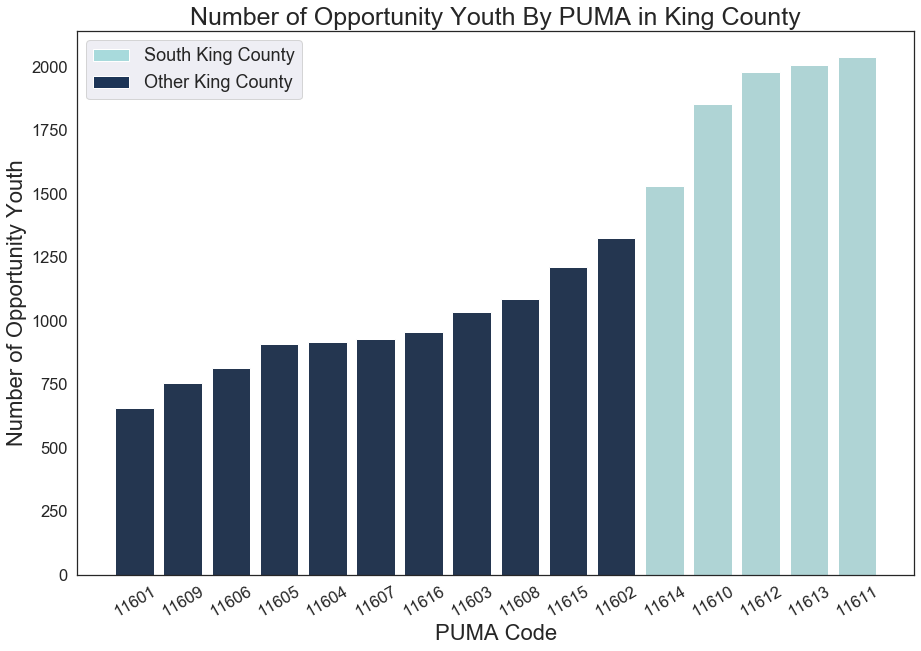

In [28]:
# Create list of labels
labels_list = [
    'Number of Opportunity Youth By PUMA in King County',
    'PUMA Code',
    'Number of Opportunity Youth'
]
mcf.create_plot_from_dict(kc_oy_per_puma, labels_list, skc_pumas)

It's very clear from the plot above that the PUMA codes in South King County have more individuals considered Opportunity Youth than other areas within King County. It's important to note however, that since the total population of those between the ages of 16 and 24 in each PUMA is not consisent, that an absolute measurement is probably not the most accurate representation of that information. Instead, let's try to represent this information as a relative measurement, visualizing the percentage of the population age 16 to 24 who is considered Opportunity Youth within each PUMA code.

To do this, we can utilize the same function to plot as above but we will need to create some data for it to graph first. So we want to create a dictionary that contains the population between the ages of 16 and 24 for each PUMA, and from there we can create a dictionary with percentage of that population considered Opportunity Youth for each PUMA. Since this first dictionary is looking at the entire population between the ages of 16 and 24 and not solely Opportunity Youth, we will use the dataframe wa_df.

In [29]:
kc_pop_per_puma = mcf.create_puma_dict(wa_df, kc_pumas)

Now that we have that, we can create a dictionary with the percentage of 16-24 year olds in the total population considered Opportunity Youth

In [31]:
kc_percent_oy = {k: ((kc_oy_per_puma[k]/kc_pop_per_puma[k]) * 100) for k in kc_pop_per_puma.keys()} 

Before we plot this information the last thing to do is to sort this data by its values.

In [32]:
kc_percent_oy_sorted = {k:v for k,v in sorted(kc_percent_oy.items(), key=lambda x: x[1])}

We now have a dictionary of the percent of the population between ages 16 and 24 who are considered Opportunity Youth sorted and with corresponding PUMA codes. It's now time to plot this data.

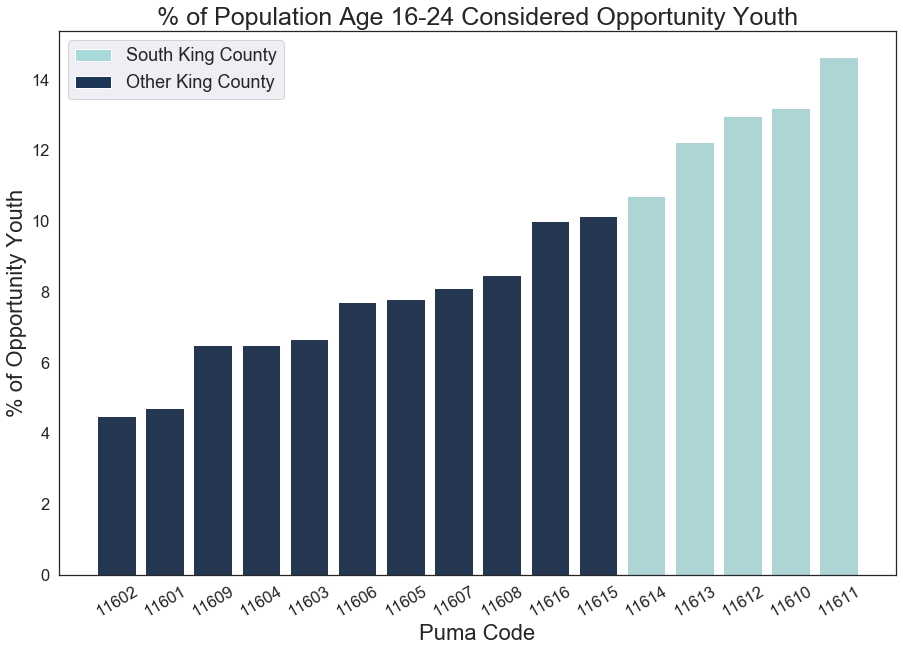

In [33]:
labels_list2 = [
    '% of Population Age 16-24 Considered Opportunity Youth',
    'Puma Code',
    '% of Opportunity Youth'
]
mcf.create_plot_from_dict(kc_percent_oy_sorted, labels_list2, skc_pumas)

It's clear from the graph above that the PUMA codes in South King County have the largest percentage of Opportunity Youth in there given population.

## Application

According to an article from the Aspen Institute, “one estimate places the personal and public costs of not changing the trajectories of opportunity youth at $6.3 trillion dollars over the lifetimes of all current opportunity youth” (Aspen Institute). The barriers preventing these individuals from reconnecting with society represent a massive economic burden on society as a whole. Removing the barriers for these individuals and helping them get reconnected with our societal structure will greatly benefit both local economies and the national economy.

Our analysis provides a basis for where relief efforts should be targeted. We found the areas within King County to have the highest number of Opportunity Youth and therefore are the areas we should most invest in. 


## Next Steps

The next steps of our project would be to identify the specific barriers that Opportunity Youth are facing. For example, the availability of transportation so they can travel to work or the presence of an authority figure to help guide them. This information could provide great insight into what strategies and policies would best get Opportunity Youth reconnected with society.
